In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data storage/prm_data_L16_FCNN.pth')
model

OrderedDict([('fc1.weight',
              tensor([[-0.0673, -0.0385, -0.0211,  ...,  0.0445, -0.0653,  0.0221],
                      [-0.0092,  0.0235,  0.0556,  ...,  0.0031, -0.0521, -0.0035],
                      [ 0.0293,  0.0191,  0.0505,  ...,  0.0159,  0.0286, -0.0091],
                      ...,
                      [ 0.0448,  0.0042,  0.0550,  ...,  0.0690, -0.0338,  0.0651],
                      [-0.0217,  0.0625,  0.0368,  ...,  0.0455, -0.0594, -0.0123],
                      [-0.0472, -0.0663, -0.0336,  ..., -0.0214, -0.0408, -0.0072]])),
             ('fc2.weight',
              tensor([[-0.0281, -0.0865,  0.0823,  ...,  0.0031,  0.0069, -0.0594],
                      [-0.0593,  0.0901, -0.0287,  ...,  0.0691, -0.0485, -0.0944],
                      [-0.0587, -0.0416, -0.0687,  ..., -0.0157,  0.0661, -0.1461],
                      ...,
                      [-0.1031, -0.0609, -0.1208,  ..., -0.1721, -0.2361, -0.0252],
                      [ 0.0500, -0.1338, -0.136

In [3]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[-0.0281, -0.0865,  0.0823,  ...,  0.0031,  0.0069, -0.0594],
        [-0.0593,  0.0901, -0.0287,  ...,  0.0691, -0.0485, -0.0944],
        [-0.0587, -0.0416, -0.0687,  ..., -0.0157,  0.0661, -0.1461],
        ...,
        [-0.1031, -0.0609, -0.1208,  ..., -0.1721, -0.2361, -0.0252],
        [ 0.0500, -0.1338, -0.1363,  ..., -0.2242, -0.1266,  0.0323],
        [-0.0348, -0.1513, -0.2001,  ..., -0.0648, -0.1209, -0.0926]])

In [4]:
fc_weight.size()

torch.Size([100, 80])

In [5]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [6]:
fc_weight_np_square

array([[-0.02807608, -0.05930168, -0.05871292, ..., -0.1031272 ,
         0.05003531, -0.03483715],
       [-0.08648095,  0.09012872, -0.04158828, ..., -0.06089761,
        -0.13384046, -0.15126681],
       [ 0.08225597, -0.0286702 , -0.0686726 , ..., -0.12075396,
        -0.1363383 , -0.20013402],
       ...,
       [ 0.00311595,  0.0690653 , -0.01571435, ..., -0.17213829,
        -0.22416307, -0.06483097],
       [ 0.00689091, -0.04851623,  0.06607742, ..., -0.23607339,
        -0.12662143, -0.12086789],
       [-0.05940505, -0.09441066, -0.14608638, ..., -0.02520353,
         0.03233372, -0.0926129 ]], dtype=float32)

In [7]:
fc_weight_np_square.shape

(80, 100)

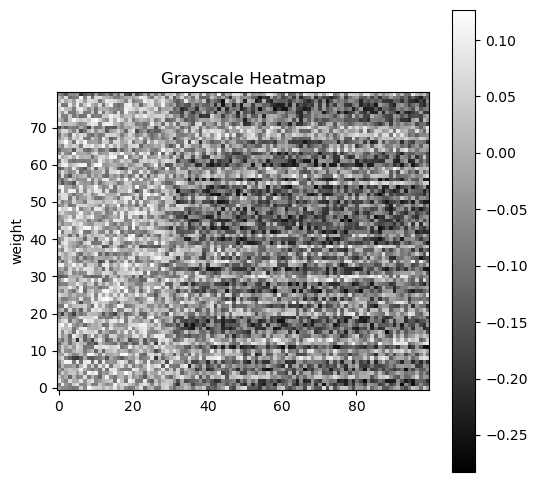

In [8]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [9]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-1.4693159 , -0.6751971 ,  0.04166204, -0.9693539 , -1.5293186 ,
       -0.54671234, -0.07257836, -1.8858479 , -0.48904738, -0.0506784 ,
       -0.65178216, -1.0752652 , -0.5279261 , -0.95959806, -0.8477036 ,
       -0.22850265,  0.09866911, -0.8834716 , -0.44787174,  0.04857206,
       -0.52758586, -1.0050769 , -1.4948066 , -0.7827725 , -0.10416089,
       -0.6445127 , -1.5705136 , -1.1008061 , -0.23499024, -1.1125247 ,
       -2.5464003 , -4.2255936 , -4.4057837 , -4.63912   , -3.605294  ,
       -6.1564703 , -5.998409  , -4.1793513 , -6.066447  , -5.5929356 ,
       -6.360853  , -5.6539235 , -6.046796  , -4.4030743 , -7.994672  ,
       -6.3638287 , -5.4437933 , -6.911606  , -6.111093  , -5.840003  ,
       -7.619831  , -5.099307  , -6.5192738 , -7.1148024 , -7.507066  ,
       -6.456152  , -5.942182  , -5.7071495 , -6.301491  , -6.6691227 ,
       -7.522162  , -7.39335   , -8.324905  , -6.579061  , -6.6897316 ,
       -8.077927  , -8.247391  , -7.098097  , -5.820449  , -6.92

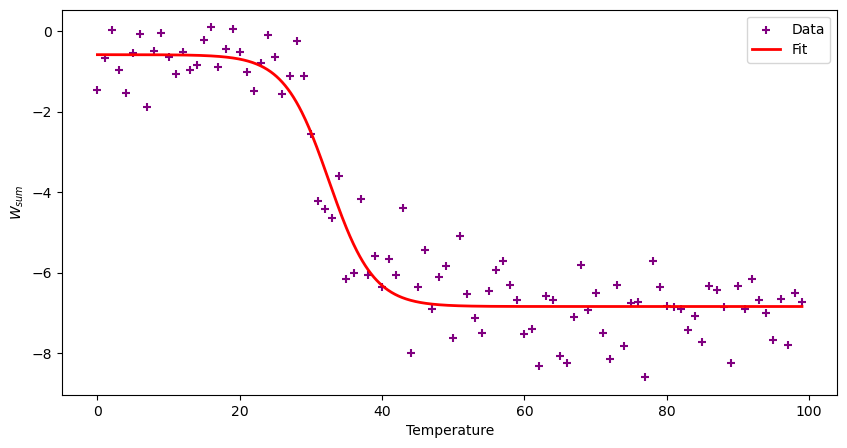

Fitted Parameters:
a: -3.128447968274831
b: 0.16018754818270928
c: -5.209490671561559
d: -3.711468489337798


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.xlabel('Temperature')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [11]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 32.52119612705249
beta: 0.4627975444610309
